In [24]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

## Reading the dataset

In [25]:
# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

# print(diabetes_sklearn.feature_names)

# Convert the dataset to a DataFrame
df = pd.DataFrame(data=diabetes_sklearn.data,
                        columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
df['target'] = diabetes_sklearn.target

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", df.shape)

df.head()

Shape of Sklearn Diabetes Data: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Splitting the data

In [27]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

* `Linear Regression`

In [28]:
# Linear Regression using OLS
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Predict
y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)

# Evaluate
mse_train_lin = mean_squared_error(y_train, y_pred_train)
mse_test_lin = mean_squared_error(y_test, y_pred_test)

mae_train_lin = mean_absolute_error(y_train, y_pred_train)
mae_test_lin = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE for training using Linear Regression = {mse_train_lin}")
print(f"MSE for testing using Linear Regression = {mse_train_lin}")
print()
print(f"MAE for training using Linear Regression = {mae_train_lin}")
print(f"MAE for testing using Linear Regression = {mae_train_lin}")
print()
print(f"R2 score for training using Linear Regression = {r2_train}")
print(f"R2 score for testing using Linear Regression = {r2_test}")

MSE for training using Linear Regression = 2880.326010197211
MSE for testing using Linear Regression = 2880.326010197211

MAE for training using Linear Regression = 43.43108308005957
MAE for testing using Linear Regression = 43.43108308005957

R2 score for training using Linear Regression = 0.5125146776875646
R2 score for testing using Linear Regression = 0.5514200923362628


* `Ridge`

https://machinelearningcompass.com/machine_learning_models/ridge_regression/

In [29]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(x_train, y_train)

# Predict
y_pred_train = ridge_reg.predict(x_train)
y_pred_test = ridge_reg.predict(x_test)

# Evaluate
mse_train_lin = mean_squared_error(y_train, y_pred_train)
mse_test_lin = mean_squared_error(y_test, y_pred_test)

mae_train_lin = mean_absolute_error(y_train, y_pred_train)
mae_test_lin = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE for training using Ridge Regression = {mse_train_lin}")
print(f"MSE for testing using Ridge Regression = {mse_train_lin}")
print()
print(f"MAE for training using Ridge Regression = {mae_train_lin}")
print(f"MAE for testing using Ridge Regression = {mae_train_lin}")
print()
print(f"R2 score for training using Ridge Regression = {r2_train}")
print(f"R2 score for testing using Ridge Regression = {r2_test}")

MSE for training using Ridge Regression = 2880.635774261038
MSE for testing using Ridge Regression = 2880.635774261038

MAE for training using Ridge Regression = 43.433522118000106
MAE for testing using Ridge Regression = 43.433522118000106

R2 score for training using Ridge Regression = 0.5124622511796066
R2 score for testing using Ridge Regression = 0.5518156209839271


* `Lasso`

In [30]:
lasso_reg = Lasso(alpha=0.001, max_iter=10000, tol=0.001)
lasso_reg.fit(x_train, y_train)

# Predict
y_pred_train = lasso_reg.predict(x_train)
y_pred_test = lasso_reg.predict(x_test)

# Evaluate
mse_train_lin = mean_squared_error(y_train, y_pred_train)
mse_test_lin = mean_squared_error(y_test, y_pred_test)

mae_train_lin = mean_absolute_error(y_train, y_pred_train)
mae_test_lin = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE for training using Lasso Regression = {mse_train_lin}")
print(f"MSE for testing using Lasso Regression = {mse_train_lin}")
print()
print(f"MAE for training using Lasso Regression = {mae_train_lin}")
print(f"MAE for testing using Lasso Regression = {mae_train_lin}")
print()
print(f"R2 score for training using Lasso Regression = {r2_train}")
print(f"R2 score for testing using Lasso Regression = {r2_test}")

MSE for training using Lasso Regression = 2880.5237641213976
MSE for testing using Lasso Regression = 2880.5237641213976

MAE for training using Lasso Regression = 43.43154921037066
MAE for testing using Lasso Regression = 43.43154921037066

R2 score for training using Lasso Regression = 0.5124812085125027
R2 score for testing using Lasso Regression = 0.5520338320113964


* `ElasticNet`

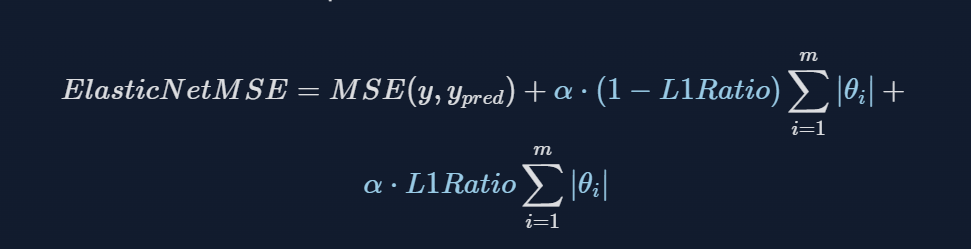

In [31]:
elastic_reg = ElasticNet(alpha=0.001, l1_ratio=0.6)
elastic_reg.fit(x_train, y_train)

# Predict
y_pred_train = elastic_reg.predict(x_train)
y_pred_test = elastic_reg.predict(x_test)

# Evaluate
mse_train_lin = mean_squared_error(y_train, y_pred_train)
mse_test_lin = mean_squared_error(y_test, y_pred_test)

mae_train_lin = mean_absolute_error(y_train, y_pred_train)
mae_test_lin = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE for training using ElasticNet Regression = {mse_train_lin}")
print(f"MSE for testing using ElasticNet Regression = {mse_train_lin}")
print()
print(f"MAE for training using ElasticNet Regression = {mae_train_lin}")
print(f"MAE for testing using ElasticNet Regression = {mae_train_lin}")
print()
print(f"R2 score for training using ElasticNet Regression = {r2_train}")
print(f"R2 score for testing using ElasticNet Regression = {r2_test}")

MSE for training using ElasticNet Regression = 2934.6542480523076
MSE for testing using ElasticNet Regression = 2934.6542480523076

MAE for training using ElasticNet Regression = 44.17624176328767
MAE for testing using ElasticNet Regression = 44.17624176328767

R2 score for training using ElasticNet Regression = 0.5033198093123541
R2 score for testing using ElasticNet Regression = 0.5457381113801587


* `SGD`

In [35]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.001, eta0=0.001,
                    learning_rate="constant", early_stopping=True, validation_fraction=0.1,
                    n_iter_no_change=5, random_state=42)

sgd_reg.fit(x_train, y_train)

# Predict
y_pred_train_sgd = sgd_reg.predict(x_train)
y_pred_test_sgd = sgd_reg.predict(x_test)

# Evaluate
mse_train_sgd = mean_squared_error(y_train, y_pred_train_sgd)
mse_test_sgd = mean_squared_error(y_test, y_pred_test_sgd)

mae_train_sgd = mean_absolute_error(y_train, y_pred_train)
mae_test_sgd = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE for Training using SGDRegressor is: {mse_train_sgd:.3f}')
print(f'MSE for Testing using SGDRegressor is: {mse_test_sgd:.3f}')
print()
print(f"MAE for training using SGDRegressor = {mae_train_sgd}")
print(f"MAE for testing using SGDRegressor = {mae_test_sgd}")
print()
print(f"R2 score for training using SGDRegressor = {r2_train}")
print(f"R2 score for testing using SGDRegressor = {r2_test}")


MSE for Training using SGDRegressor is: 5752.148
MSE for Testing using SGDRegressor is: 5951.294

MAE for training using SGDRegressor = 44.17624176328767
MAE for testing using SGDRegressor = 42.170603489604666

R2 score for training using SGDRegressor = 0.5033198093123541
R2 score for testing using SGDRegressor = 0.5457381113801587
